# Project: Investigate a Dataset - Movie_Dataset_Analysis
This is simple analysis of a movie dataset with visualizations. Thank you for taking your time to review.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset details information of movies from 1969 to 2014. 
It includes, movie titles, budgets, directors, revenues, and more.


### Question(s) for Analysis
1. Can there be a relationship between movie budget and revenue?
2. Can there be a relationship between movie budget and vote average?
3. Can we find the top 10 movies?
4. Can we find the years with the most movies produced?

In [1]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [2]:
# import and assign csv file to dataframe (df)

df=pd.read_csv('tmdb-movies.csv')

# show last 15 rows of the df
df.tail(10)

id    imdb_id  popularity  budget  revenue  \
10856  20277  tt0061135    0.140934       0        0   
10857   5921  tt0060748    0.131378       0        0   
10858  31918  tt0060921    0.317824       0        0   
10859  20620  tt0060955    0.089072       0        0   
10860   5060  tt0060214    0.087034       0        0   
10861     21  tt0060371    0.080598       0        0   
10862  20379  tt0060472    0.065543       0        0   
10863  39768  tt0060161    0.065141       0        0   
10864  21449  tt0061177    0.064317       0        0   
10865  22293  tt0060666    0.035919   19000        0   

                                         original_title  \
10856                                The Ugly Dachshund   
10857                                      Nevada Smith   
10858  The Russians Are Coming, The Russians Are Coming   
10859                                           Seconds   
10860                               Carry On Screaming!   
10861                                The Endless Summer   
10862                                        Grand Prix   
10863                               Beregis Avtomobilya   
10864                            What's Up, Tiger Lily?   
10865                          Manos: The Hands of Fate   

                                                    cast homepage  \
10856  Dean Jones|Suzanne Pleshette|Charles Ruggles|K...      NaN   
10857  Steve McQueen|Karl Malden|Brian Keith|Arthur K...      NaN   
10858  Carl Reiner|Eva Marie Saint|Alan Arkin|Brian K...      NaN   
10859  Rock Hudson|Salome Jens|John Randolph|Will Gee...      NaN   
10860  Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...      NaN   
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...      NaN   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...      NaN   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...      NaN   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...      NaN   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...      NaN   

                 director                                            tagline  \
10856        Norman Tokar  A HAPPY HONEYMOON GOES TO THE DOGS!...When a G...   
10857      Henry Hathaway  Some called him savage- and some called him sa...   
10858      Norman Jewison   IT'S A PLOT! ...to make the world die laughing!!   
10859  John Frankenheimer                                                NaN   
10860       Gerald Thomas  Carry On Screaming with the Hilarious CARRY ON...   
10861         Bruce Brown                                                NaN   
10862  John Frankenheimer  Cinerama sweeps YOU into a drama of speed and ...   
10863      Eldar Ryazanov                                                NaN   
10864         Woody Allen                          WOODY ALLEN STRIKES BACK!   
10865    Harold P. Warren       It's Shocking! It's Beyond Your Imagination!   

       ...                                           overview runtime  \
10856  ...  The Garrisons (Dean Jones and Suzanne Pleshett...      93   
10857  ...  Nevada Smith is the young son of an Indian mot...     128   
10858  ...  Without hostile intent, a Soviet sub runs agro...     126   
10859  ...  A secret organisation offers wealthy people a ...     100   
10860  ...  The sinister Dr Watt has an evil scheme going....      87   
10861  ...  The Endless Summer, by Bruce Brown, is one of ...      95   
10862  ...  Grand Prix driver Pete Aron is fired by his te...     176   
10863  ...  An insurance agent who moonlights as a carthie...      94   
10864  ...  In comic Woody Allen's film debut, he took the...      80   
10865  ...  A family gets lost on the road and stumbles up...      74   

                                       genres  \
10856                     Comedy|Drama|Family   
10857                          Action|Western   
10858                              Comedy|War   
10859  Mystery|Science Fiction|Thriller|Drama   
10860                                  Comedy   
1086

In [3]:
# Find the total number of rows and columns of the dataframe;

df.shape

(10866, 21)

There are 10866 rows and 21 columns

In [4]:
# find extensive details including datatypes of each column of the dataframe;

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# Find a statistical overview of the dataframe

df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [6]:
# Compute the total number of duplicates (if any)

sum(df.duplicated())

1

Only 1 row was duplicated

In [7]:
# Find the range of years of the dataframe;

df['release_year'].value_counts()

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1991    133
1992    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1977     57
1979     57
1973     55
1971     55
1976     47
1974     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1960     32
1962     32
1961     31
1969     31
Name: release_year, dtype: int64

This data ranges between 1969 and 2014

In [8]:
# Identify the number of unique values in the dataset;
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [9]:
# This is to find the total number of missing values in the dataframe;
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Some columns had missing data


### Data Cleaning
> Now we can try and reorganize the data

In [10]:
# View the first view rows
df.head(2)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

                        homepage         director             tagline  ...  \
0  http://www.jurassicworld.com/  Colin Trevorrow   The park is open.  ...   
1    http://www.madmaxmovie.com/    George Miller  What a Lovely Day.  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  

[2 rows x 21 columns]

In [11]:
# Identify columns that are not relevant to current project

drop_columns=['cast', 'homepage', 'tagline', 'overview', 'production_companies', 'keywords', 'budget_adj', 'revenue_adj']

In [12]:
# Drop columns that are not relevant to 
#     current project using the drop function

df.drop(drop_columns, axis=1, inplace=True)

In [13]:
# Confirm new shape of dataframe
df.shape

(10866, 13)

8 columns dropped

In [14]:
# Confirm new dataframe

df.head(2)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

          director  runtime                                     genres  \
0  Colin Trevorrow      124  Action|Adventure|Science Fiction|Thriller   
1    George Miller      120  Action|Adventure|Science Fiction|Thriller   

  release_date  vote_count  vote_average  release_year  
0       6/9/15        5562           6.5          2015  
1      5/13/15        6185           7.1          2015

In [15]:
# Remove duplicates

df.drop_duplicates(inplace=True)

In [16]:
# Confirm new shape

df.shape

(10865, 13)

In [17]:
df.isnull().sum() #find total missing values in new dataframe 

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [18]:
df.dropna(axis=0, inplace=True) #drop the missing values

In [19]:
df.shape #confirm new shape

(10795, 13)

<a id='eda'></a>
## Exploratory Data Analysis

> We explore the use of charts and visualizations on variables and their relations with each other. 

### Research Question 1. Which year was the most movies produced?

In [20]:
# Finding the years with the most movie productions;

top_5years=df['release_year'].value_counts()[:5]

Text(0.5, 1.0, 'Highest Number of Movies Produced per Year')

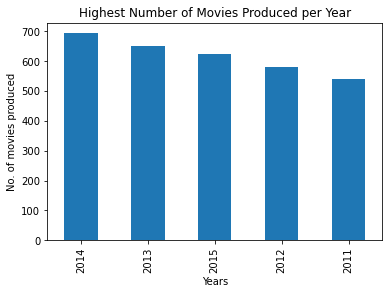

In [21]:
# Bar chart representing the top 5 years with the most produced;

top_5years.plot(x='release_year', kind='bar');
plt.xlabel('Years')
plt.ylabel('No. of movies produced')
plt.title('Highest Number of Movies Produced per Year')

2011, 2012, 2015, 2013 and 2014 had the most movies produced

### Research Question 2.  What movies had the highest budget?

In [22]:
# Finding the movies with the highest budget;
## Sliced the dataframe by grouping and finding the mean value

highest_budget=df.groupby('original_title')['budget'].mean()

In [23]:
# Sort and find the top 10 movie budgets;

highest_budget=highest_budget.sort_values(ascending=False)[:10]

In [24]:
# Bar chart representing the top 10 movie budgets;  

highest_budget.plot(x='original_title', kind='bar');
plt.xlabel('Title of Movie')
plt.ylabel('Budget Amount')
plt.title('High Budget Movies')

Text(0.5, 1.0, 'High Budget Movies')

The Warrior's Way had the highest production budget

In [25]:
# Function that helps us to avoid repetitive codes;

def no_repeat(df, xw, yw):
    x=df[xw]
    y=df[yw]
    
    plt.scatter(x,y,)

### Question: Is there are relationship between budget and revenue of a movie?

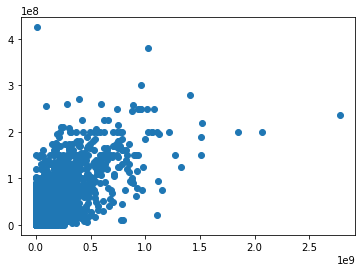

In [26]:
# Relation between movie budget and movie revenue;

no_repeat(df,'revenue','budget')

### Is there a relationship between movie budgets and the average votes?

In [27]:
# Relation between movie budget and average vote;

no_repeat(df, 'vote_average', 'budget')

<a id='conclusions'></a>
## Conclusions'

> 2011, 2012, 2015, 2013 and 2014 had the most movies produced
> We can infer that The Warrior's Way had the highest budget
> There is a positive relationship between budget and revenue
> Vote averages tend to be higher when the movie budget isn't that high.

Limitations
> Enough time is needed to explore this dataset. 


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295